## IMPORTING LIBRARIES

In [1]:
import sys 
import os
root_dir = os.path.abspath(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(root_dir)



import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.features.build_features import inspect_dataframe
from src.features.build_features import preprocess_calendar, filter_train_data, process_sales_data




## READING THE DATA 

In [2]:
calender_events_df = pd.read_csv('../../data/raw/calendar_events.csv')
calender_df = pd.read_csv('../../data/raw/calendar.csv')
items_df = pd.read_csv('../../data/raw/items_weekly_sell_prices.csv')
train_df = pd.read_csv('../../data/raw/sales_train.csv')

In [3]:
calender_events_df.head()

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious


## DATA INSPECTION

In [3]:
inspect_dataframe(calender_events_df, "calender_events_df")
inspect_dataframe(calender_df, "calender_df")
inspect_dataframe(items_df, "items_df")
inspect_dataframe(train_df, "train_df")



Data Inspection for DataFrame: calender_events_df
--------------------------------------------------
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        167 non-null    object
 1   event_name  167 non-null    object
 2   event_type  167 non-null    object
dtypes: object(3)
memory usage: 4.0+ KB

Head (first few rows):


,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious



Shape of df: (167, 3)

Summary Statistics:


,date,event_name,event_type
count,167,167,167
unique,162,30,4
top,2016-06-19,SuperBowl,Religious
freq,2,6,56



Missing Values Count:


date          0
event_name    0
event_type    0
dtype: int64


Unique Values Count:


date          162
event_name     30
event_type      4
dtype: int64




Data Inspection for DataFrame: calender_df
--------------------------------------------------
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      1969 non-null   object
 1   wm_yr_wk  1969 non-null   int64 
 2   d         1969 non-null   object
dtypes: int64(1), object(2)
memory usage: 46.3+ KB

Head (first few rows):


,date,wm_yr_wk,d
0,2011-01-29,11101,d_1
1,2011-01-30,11101,d_2
2,2011-01-31,11101,d_3
3,2011-02-01,11101,d_4
4,2011-02-02,11101,d_5



Shape of df: (1969, 3)

Summary Statistics:


,wm_yr_wk
count,1969.000000
mean,11347.086338
std,155.277043
min,11101.000000
25%,11219.000000
50%,11337.000000
75%,11502.000000
max,11621.000000



Missing Values Count:


date        0
wm_yr_wk    0
d           0
dtype: int64


Unique Values Count:


date        1969
wm_yr_wk     282
d           1969
dtype: int64




Data Inspection for DataFrame: items_df
--------------------------------------------------
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB

Head (first few rows):


,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26



Shape of df: (6841121, 4)

Summary Statistics:


,wm_yr_wk,sell_price
count,6.841121e+06,6.841121e+06
mean,1.138294e+04,4.410952e+00
std,1.486100e+02,3.408814e+00
min,1.110100e+04,1.000000e-02
25%,1.124700e+04,2.180000e+00
50%,1.141100e+04,3.470000e+00
75%,1.151700e+04,5.840000e+00
max,1.162100e+04,1.073200e+02



Missing Values Count:


store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64


Unique Values Count:


store_id        10
item_id       3049
wm_yr_wk       282
sell_price    1048
dtype: int64




Data Inspection for DataFrame: train_df
--------------------------------------------------
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30490 entries, 0 to 30489
Columns: 1547 entries, id to d_1541
dtypes: int64(1541), object(6)
memory usage: 359.9+ MB

Head (first few rows):


,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3



Shape of df: (30490, 1547)

Summary Statistics:


,d_1,d_2,d_3,d_4,d_5,d_6,d_7,d_8,d_9,d_10,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
count,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,...,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000,30490.000000
mean,1.070220,1.041292,0.780026,0.833454,0.627944,0.958052,0.918662,1.244080,1.073663,0.838701,...,1.129452,1.208691,1.484815,1.547393,1.131322,1.101902,1.137750,1.030863,1.084257,1.394424
std,5.126689,5.365468,3.667454,4.415141,3.379344,4.785947,5.059495,6.617729,5.917204,4.206199,...,3.219694,3.276399,3.964839,4.086634,3.035784,3.751499,3.219956,2.957792,3.159583,3.922461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,360.000000,436.000000,207.000000,323.000000,296.000000,314.000000,316.000000,370.000000,385.000000,353.000000,...,89.000000,128.000000,116.000000,131.000000,93.000000,299.000000,104.000000,129.000000,161.000000,192.000000



Missing Values Count:


id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
           ..
d_1537      0
d_1538      0
d_1539      0
d_1540      0
d_1541      0
Length: 1547, dtype: int64


Unique Values Count:


id          30490
item_id      3049
dept_id         7
cat_id          3
store_id       10
            ...  
d_1537         64
d_1538         59
d_1539         55
d_1540         61
d_1541         70
Length: 1547, dtype: int64

In [17]:
train_df.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


# EDA

Calendar dataset contains columns like 'date', 'weekday', 'wday', 'month' and 'year' etc which basically indicates the overall duration across which this dataset was made.

It also contains columns like 'event_name_1', 'event_name_2' which represents whether there was any holiday or event like christmas, father's day, etc that can lead to an increase in the sales of the items.

From the sales_trainvalidation dataset given above we can observe that there are 30490 rows and 1547 columns, and if we observe the columns having 'd' in it's name, we can conclude that sales data for 1541 days have been provided to us.

In [5]:
train_df['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

#### So we have three different categories namely:
    1. Hobbies
    2. Household 
    3. Foods

In [6]:
train_df['dept_id'].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

And within each categories, there are different departments. For example: for Hobbies category we have departments like Hobbies_1 and Hobbies_2. Similarly for Household and Foods categories.

In [7]:
train_df['state_id'].unique()

array(['CA', 'TX', 'WI'], dtype=object)

In [8]:
train_df['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

The sales for three different states have been provided which are California, Texas and Wisconsin. Similar to the categories here also we have different stores for each state. For example in case of California we have CA_1, CA_2, and so on.

In [9]:
items_df['item_id'].nunique()

3049

We have 3049 unique items

In [10]:
train_df['store_id'].value_counts()

store_id
CA_1    3049
CA_2    3049
CA_3    3049
CA_4    3049
TX_1    3049
TX_2    3049
TX_3    3049
WI_1    3049
WI_2    3049
WI_3    3049
Name: count, dtype: int64

Our training data contains the sales of each 3049 items in each store which means train_df represents the sale of each item in 10 different stores(30490 * 10) for 1541 days

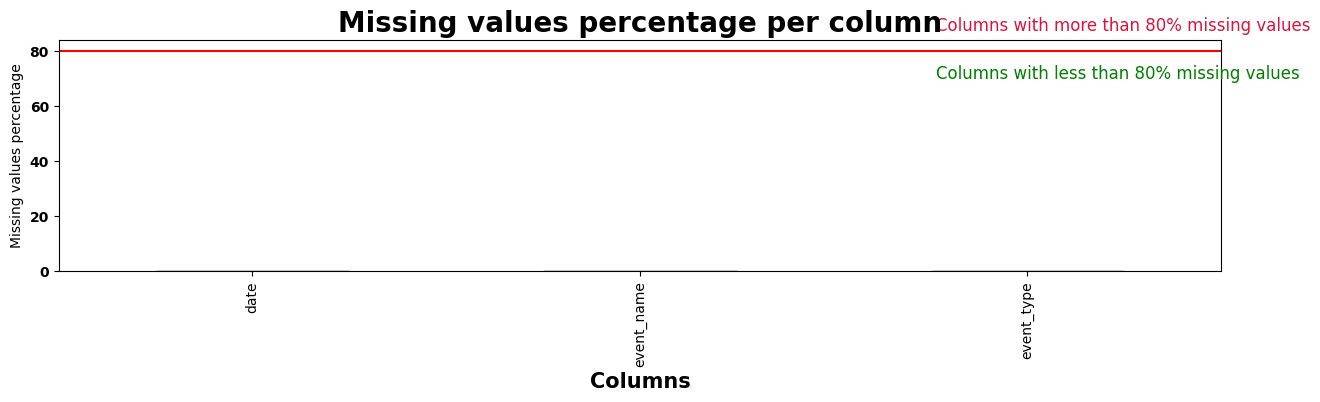

In [16]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5, f'Columns with more than {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(calender_events_df, 80, color=sns.color_palette('Reds',15))

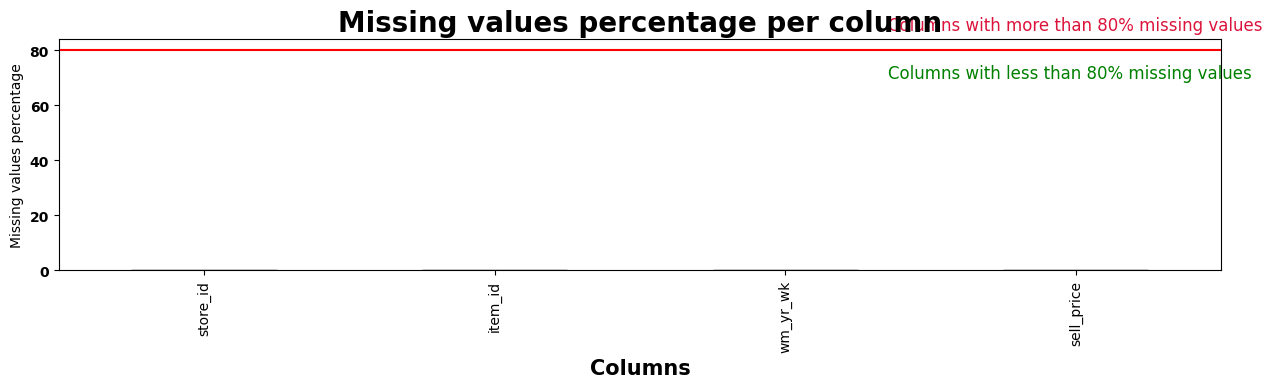

In [23]:
msv_1(items_df, 80, color=sns.color_palette('Reds',15))

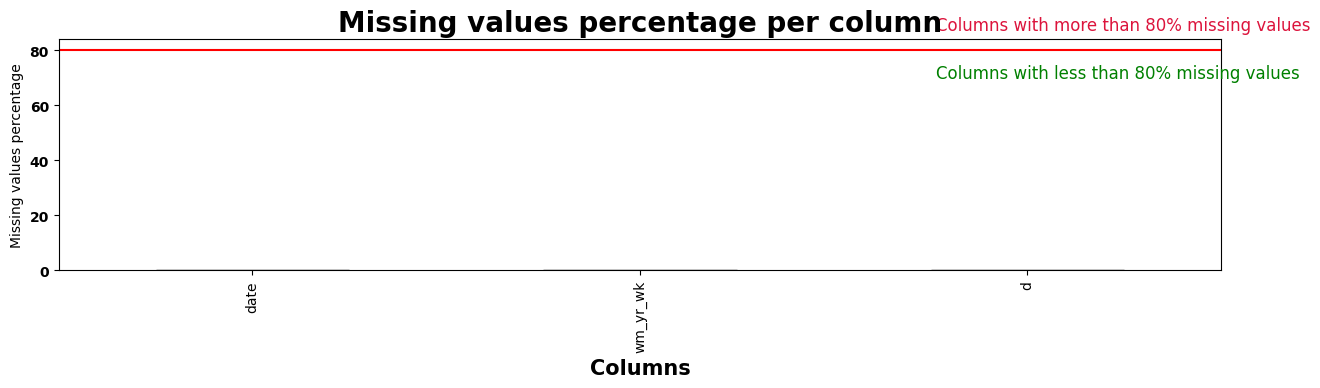

In [24]:
msv_1(calender_df, 80, color=sns.color_palette('Reds',15))

### Analysing  the sales of random items 

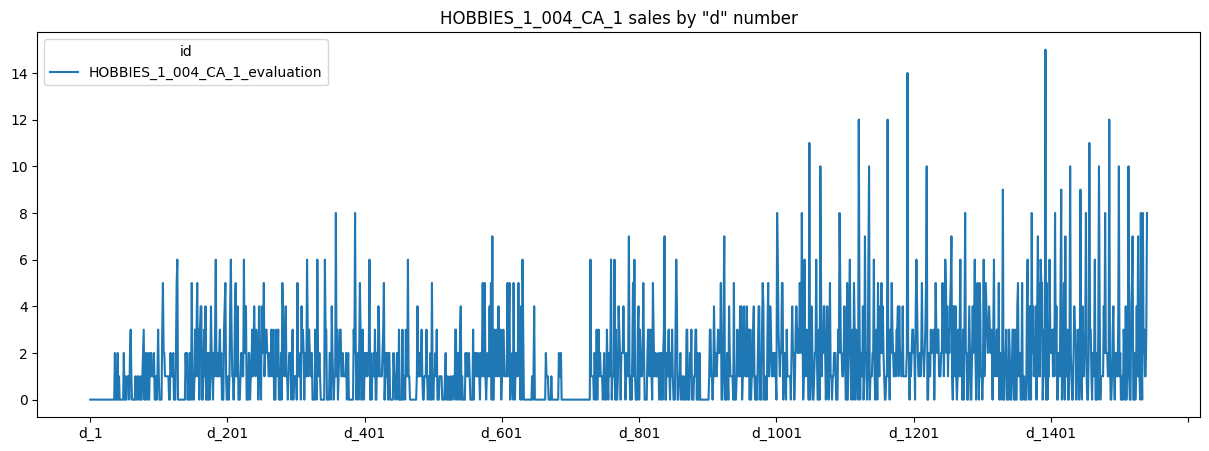

In [4]:
from itertools import cycle
import matplotlib.pyplot as plt

color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

dcols = [c for c in train_df.columns if 'd_' in c] ## Represents the days(d_1 -> d_1913)

train_df.loc[train_df['id'] == 'HOBBIES_1_004_CA_1_evaluation'].set_index('id')[dcols].T.plot(
figsize = (15, 5), title='HOBBIES_1_004_CA_1 sales by "d" number', color = next(color_cycle))
plt.show()

In [21]:
### We'll be utilising these visualisation in our forecasting model as it might be useful for that scenari 

## Merging the data for further analysis
#### Since the goal here is to choose one specific state, specific store and a specific item we'll keep the goal in mind while performing the next few steps.

In [4]:

final_calendar = preprocess_calendar(calender_df, calender_events_df)
filtered_train = filter_train_data(train_df)  # You can pass other values as well
final_sales_data = process_sales_data(filtered_train, final_calendar, items_df)
print(final_sales_data)


           date  Sales Day         event_name event_type   
0    2011-01-29          1  no specific event       none  \
1    2011-01-30          2  no specific event       none   
2    2011-01-31          3  no specific event       none   
3    2011-02-01          4  no specific event       none   
4    2011-02-02          5  no specific event       none   
...         ...        ...                ...        ...   
1536 2015-04-14       1537  no specific event       none   
1537 2015-04-15       1538  no specific event       none   
1538 2015-04-16       1539  no specific event       none   
1539 2015-04-17       1540  no specific event       none   
1540 2015-04-18       1541  no specific event       none   

      Daily volume of sales  Daily selling price  Sales Revenue  
0                         3                 0.60           1.80  
1                         0                 0.00           0.00  
2                         0                 0.00           0.00  
3              

In [5]:
final_sales_data.head(10)

,date,Sales Day,event_name,event_type,Daily volume of sales,Daily selling price,Sales Revenue
0,2011-01-29,1,no specific event,none,3,0.600000,1.800000
1,2011-01-30,2,no specific event,none,0,0.000000,0.000000
2,2011-01-31,3,no specific event,none,0,0.000000,0.000000
3,2011-02-01,4,no specific event,none,1,0.200000,0.200000
4,2011-02-02,5,no specific event,none,4,0.800000,3.200000
5,2011-02-03,6,no specific event,none,2,0.400000,0.800000
6,2011-02-04,7,no specific event,none,0,0.000000,0.000000
7,2011-02-05,8,no specific event,none,2,0.666667,1.333333
8,2011-02-06,9,SuperBowl,Sporting,0,0.000000,0.000000
9,2011-02-07,10,no specific event,none,0,0.000000,0.000000


<Figure size 1400x700 with 0 Axes>

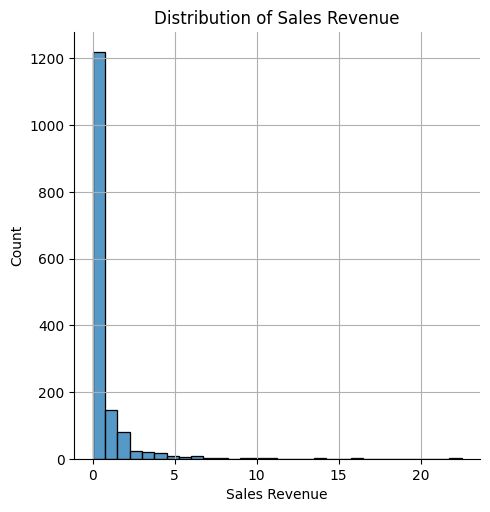

In [5]:
# 1. Distribution of the Target Variable - 'Sales Revenue'
plt.figure(figsize=(14,7))
sns.displot(final_sales_data['Sales Revenue'], bins=30)
plt.title('Distribution of Sales Revenue')
plt.grid(True)
plt.show()

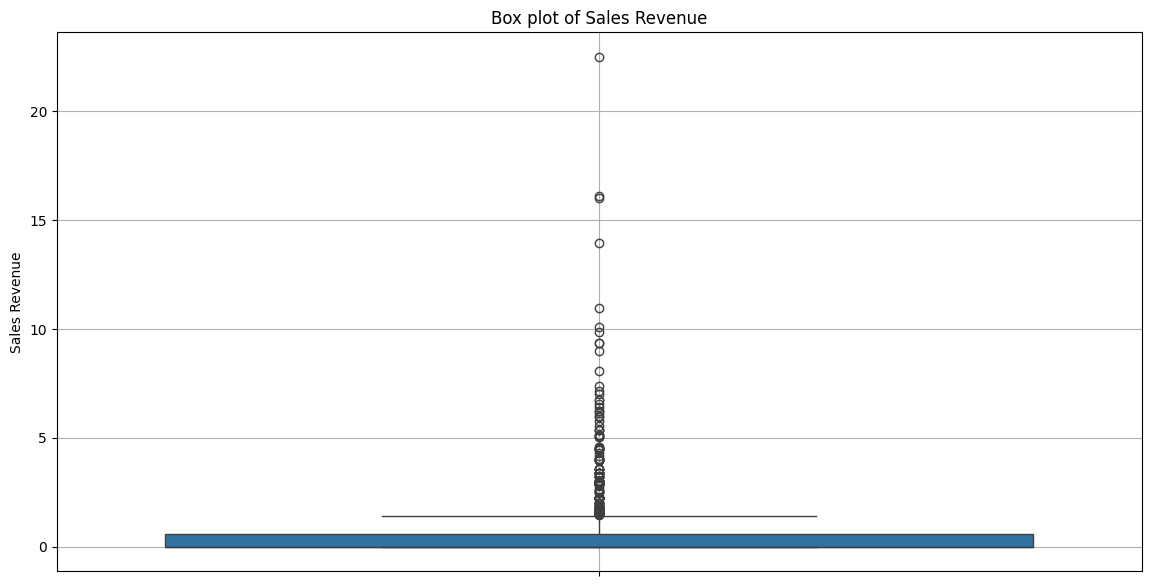

In [6]:
# Outliers
# Box plot for Sales Revenue to detect outliers
plt.figure(figsize=(14,7))
sns.boxplot(final_sales_data['Sales Revenue'])
plt.title('Box plot of Sales Revenue')
plt.grid(True)
plt.show()

In [11]:
final_sales_data.columns

Index(['Sales Day', 'event_name', 'event_type', 'Daily volume of sales',
       'Daily selling price', 'Sales Revenue'],
      dtype='object')

In [21]:
final_sales_data['Day of Week'] = final_sales_data['date'].dt.dayofweek
final_sales_data['Month'] = final_sales_data['date'].dt.month
final_sales_data['Year'] = final_sales_data['date'].dt.year


In [22]:
final_sales_data.head()

,date,Sales Day,event_name,event_type,Daily volume of sales,Daily selling price,Sales Revenue,Day of Week,Month,Year
0,2011-01-29,1,no specific event,none,3,0.6,1.8,5,1,2011
1,2011-01-30,2,no specific event,none,0,0.0,0.0,6,1,2011
2,2011-01-31,3,no specific event,none,0,0.0,0.0,0,1,2011
3,2011-02-01,4,no specific event,none,1,0.2,0.2,1,2,2011
4,2011-02-02,5,no specific event,none,4,0.8,3.2,2,2,2011


In [23]:
final_sales_data.drop('date', axis=1, inplace=True)


In [24]:
final_sales_data.head()

,Sales Day,event_name,event_type,Daily volume of sales,Daily selling price,Sales Revenue,Day of Week,Month,Year
0,1,no specific event,none,3,0.6,1.8,5,1,2011
1,2,no specific event,none,0,0.0,0.0,6,1,2011
2,3,no specific event,none,0,0.0,0.0,0,1,2011
3,4,no specific event,none,1,0.2,0.2,1,2,2011
4,5,no specific event,none,4,0.8,3.2,2,2,2011


In [15]:
final_sales_data['event_name'].unique()

array(['no specific event', 'SuperBowl', 'ValentinesDay', 'PresidentsDay',
       'LentStart', 'LentWeek2', 'StPatricksDay', 'Purim End',
       'Easter & OrthodoxEaster', 'Pesach End', 'Cinco De Mayo',
       "Mother's day", 'MemorialDay', 'NBAFinalsStart', 'NBAFinalsEnd',
       "Father's day", 'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr',
       'LaborDay', 'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter',
       'OrthodoxEaster', 'Cinco De Mayo & OrthodoxEaster',
       "Father's day & NBAFinalsEnd"], dtype=object)

In [13]:
final_sales_data['event_type'].unique()

array(['none', 'Sporting', 'Cultural', 'National', 'Religious',
       'Cultural & Religious', 'Cultural & Sporting'], dtype=object)

### HANDLING CATEGORICAL VALUES

 #### 1. EVENT NAME

In [25]:
cat_df = final_sales_data.copy()

In [26]:
# Applying one-hot encoding
encoded_data = pd.get_dummies(cat_df, columns=['event_name'], drop_first=True)


In [9]:
encoded_data['event_type'].unique()

array(['none', 'Sporting', 'Cultural', 'National', 'Religious',
       'Cultural & Religious', 'Cultural & Sporting'], dtype=object)

In [16]:
encoded_data.head()

,date,Sales Day,event_type,Daily volume of sales,Daily selling price,Sales Revenue,Day of Week,Month,Year,event_name_Christmas,...,event_name_Pesach End,event_name_PresidentsDay,event_name_Purim End,event_name_Ramadan starts,event_name_StPatricksDay,event_name_SuperBowl,event_name_Thanksgiving,event_name_ValentinesDay,event_name_VeteransDay,event_name_no specific event
0,2011-01-29,1,none,3,0.6,1.8,5,1,2011,0,...,0,0,0,0,0,0,0,0,0,1
1,2011-01-30,2,none,0,0.0,0.0,6,1,2011,0,...,0,0,0,0,0,0,0,0,0,1
2,2011-01-31,3,none,0,0.0,0.0,0,1,2011,0,...,0,0,0,0,0,0,0,0,0,1
3,2011-02-01,4,none,1,0.2,0.2,1,2,2011,0,...,0,0,0,0,0,0,0,0,0,1
4,2011-02-02,5,none,4,0.8,3.2,2,2,2011,0,...,0,0,0,0,0,0,0,0,0,1


In [27]:
for col in encoded_data.columns:
    if encoded_data[col].dtype == bool:
        encoded_data[col] = encoded_data[col].astype(int)


In [28]:
# Defining the ordinal mapping
ordinal_mapping = {
    'none': 0, 
    'Sporting': 1, 
    'Cultural': 2, 
    'National': 3, 
    'Religious': 4, 
    'Cultural & Religious': 5, 
    'Cultural & Sporting': 6
}

# Applying ordinal encoding to the 'event_type' column
encoded_data['event_type'] = encoded_data['event_type'].map(ordinal_mapping)


In [29]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 41 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sales Day                                  1541 non-null   int32  
 1   event_type                                 1541 non-null   int64  
 2   Daily volume of sales                      1541 non-null   int64  
 3   Daily selling price                        1541 non-null   float64
 4   Sales Revenue                              1541 non-null   float64
 5   Day of Week                                1541 non-null   int32  
 6   Month                                      1541 non-null   int32  
 7   Year                                       1541 non-null   int32  
 8   event_name_Christmas                       1541 non-null   int32  
 9   event_name_Cinco De Mayo                   1541 non-null   int32  
 10  event_name_Cinco De Mayo

In [20]:
correlation_matrix = encoded_data.corr()


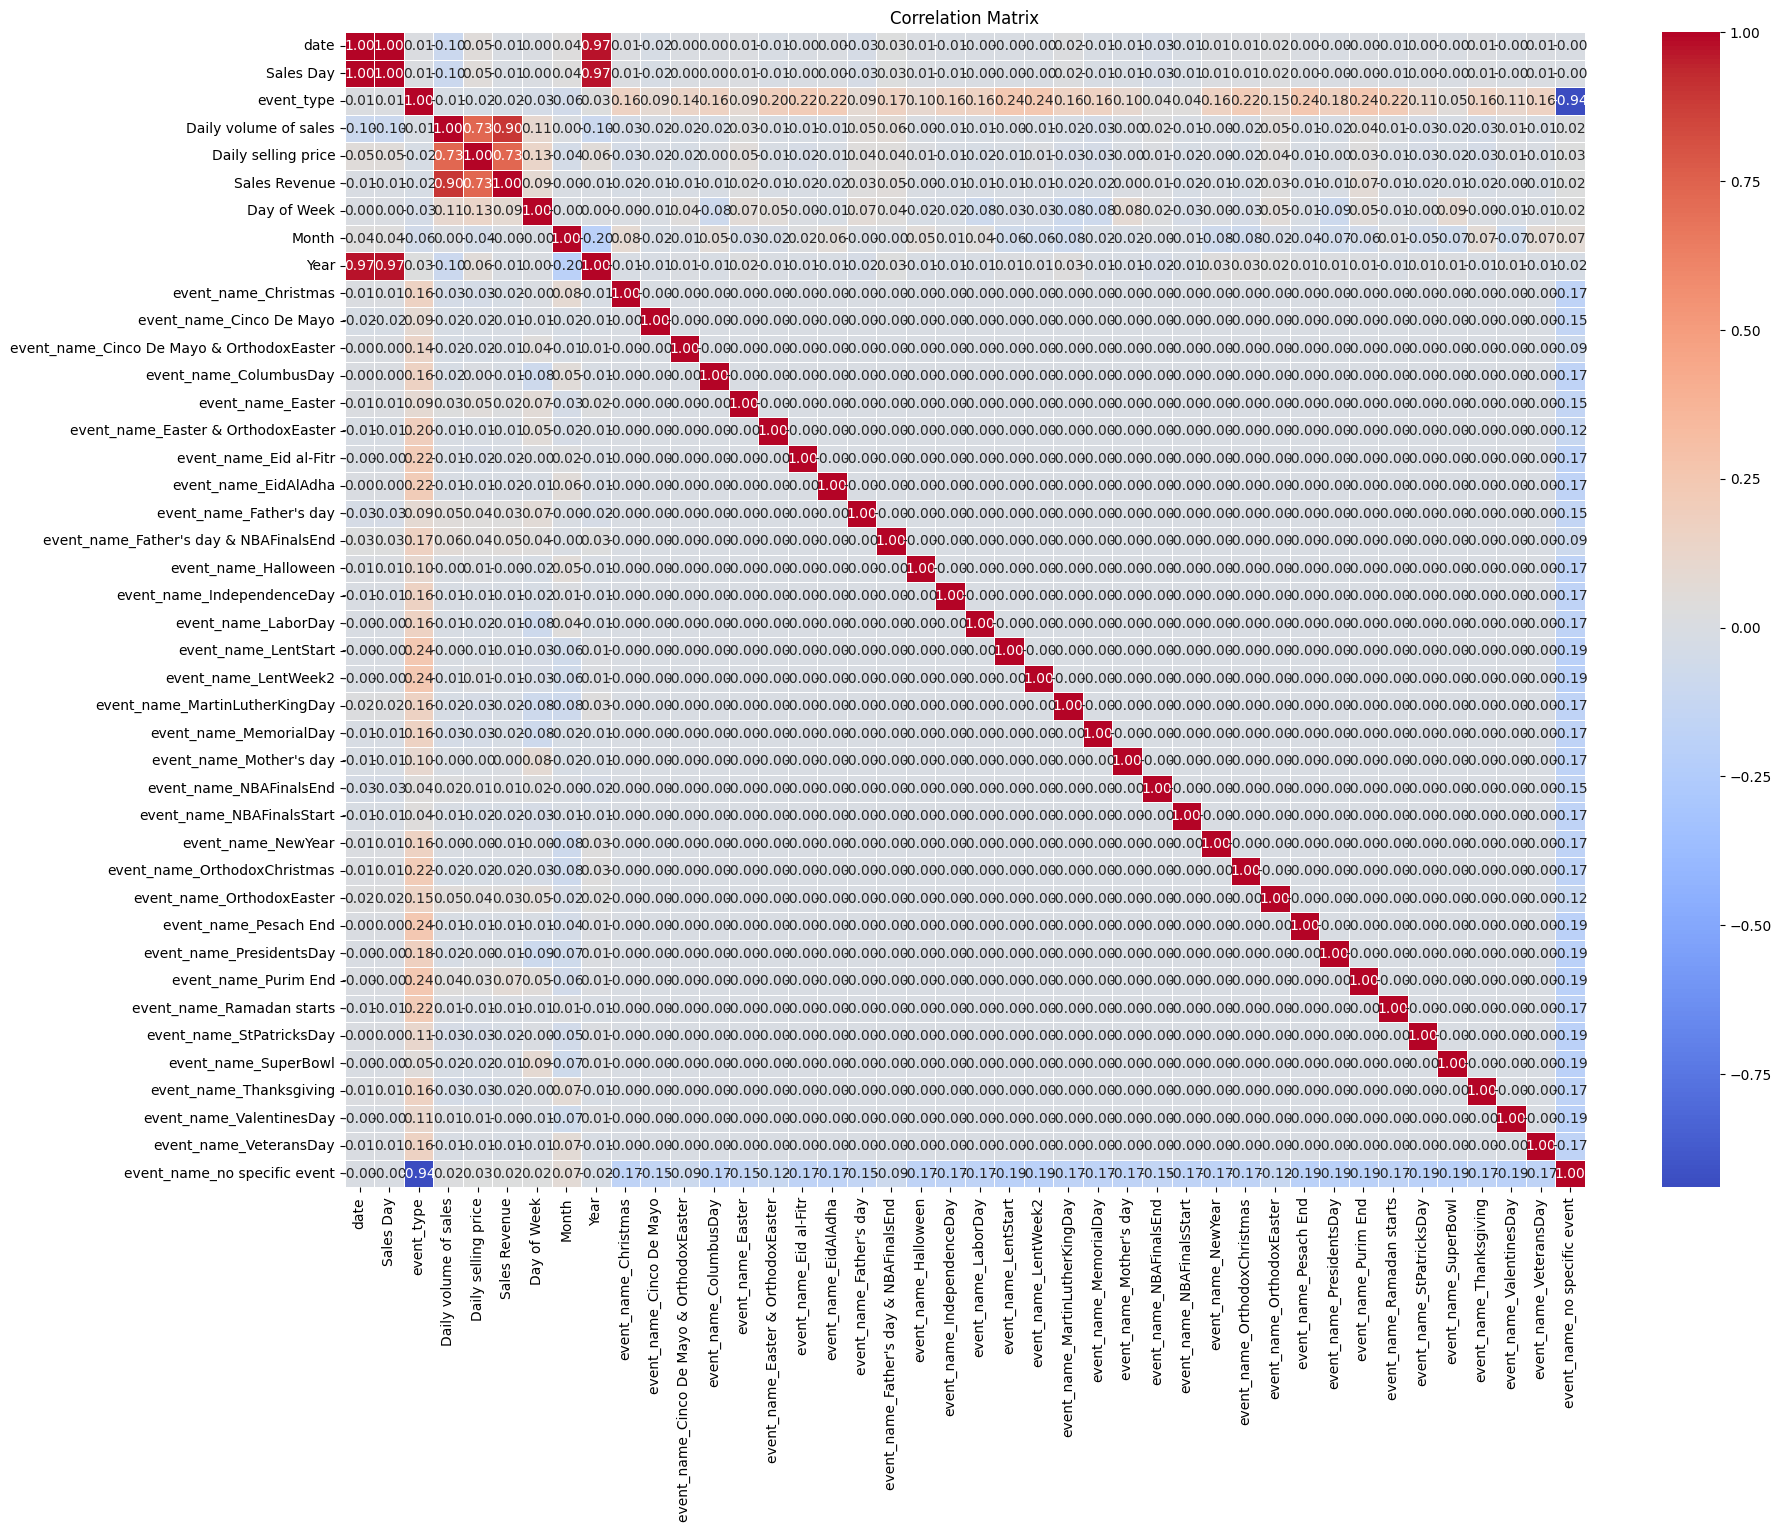

In [45]:

# Set the display options to show all columns without truncation
pd.set_option('display.max_columns', None)

# Display the first row of the DataFrame
print(encoded_data.head(1))

        date  Sales Day  event_type  Daily volume of sales   
0 2011-01-29          1           0                      3  \

   Daily selling price  Sales Revenue  Day of Week  Month  Year   
0                  0.6            1.8            5      1  2011  \

   event_name_Christmas  event_name_Cinco De Mayo   
0                     0                         0  \

   event_name_Cinco De Mayo & OrthodoxEaster  event_name_ColumbusDay   
0                                          0                       0  \

   event_name_Easter  event_name_Easter & OrthodoxEaster   
0                  0                                   0  \

   event_name_Eid al-Fitr  event_name_EidAlAdha  event_name_Father's day   
0                       0                     0                        0  \

   event_name_Father's day & NBAFinalsEnd  event_name_Halloween   
0                                       0                     0  \

   event_name_IndependenceDay  event_name_LaborDay  event_name_LentStart   
0  

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Data Preprocessing
X = encoded_data.drop(columns=['Sales Revenue', 'date'])  # Drop target and non-numeric columns
y = encoded_data['Sales Revenue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Selection
model = LinearRegression()

# 4. Model Training
model.fit(X_train, y_train)

# 5. Model Evaluation on Test Set
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Test Set Evaluation:")
print(f"Mean Squared Error: {mse_test}")
print(f"Mean Absolute Error: {mae_test}")
print(f"R-squared: {r2_test}")


Test Set Evaluation:
Mean Squared Error: 0.27159885324016364
Mean Absolute Error: 0.4279611850389676
R-squared: 0.7234780733190551


In [25]:
from sklearn.ensemble import RandomForestRegressor

# Model selection
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model training
rf_model.fit(X_train, y_train)

# Model evaluation on test set
y_pred_test_rf = rf_model.predict(X_test)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Random Forest Test Set Evaluation:")
print(f"Mean Squared Error: {mse_test_rf}")
print(f"Mean Absolute Error: {mae_test_rf}")
print(f"R-squared: {r2_test_rf}")


Random Forest Test Set Evaluation:
Mean Squared Error: 0.004226372351435425
Mean Absolute Error: 0.00895960287824384
R-squared: 0.9956970192931685


## CROSS-VALIDATION

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Create a Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100)

# Perform k-fold cross-validation, for example, using 10 folds
scores = cross_val_score(rf, X, y, cv=10, scoring='r2')

# Print the scores for each fold
for i, score in enumerate(scores, 1):
    print(f"Fold {i}: R^2 = {score:.4f}")

# Print the average score and standard deviation
print(f"\nAverage R^2: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")


Fold 1: R^2 = 0.9328
Fold 2: R^2 = 0.9531
Fold 3: R^2 = 0.9051
Fold 4: R^2 = 0.8609
Fold 5: R^2 = 0.9956
Fold 6: R^2 = 0.8800
Fold 7: R^2 = 0.9937
Fold 8: R^2 = 0.9949
Fold 9: R^2 = 0.9979
Fold 10: R^2 = 0.9655

Average R^2: 0.9480
Standard Deviation: 0.0486


In [43]:
encoded_data.columns

Index(['date', 'Sales Day', 'event_type', 'Daily volume of sales',
       'Daily selling price', 'Sales Revenue', 'Day of Week', 'Month', 'Year',
       'event_name_Christmas', 'event_name_Cinco De Mayo',
       'event_name_Cinco De Mayo & OrthodoxEaster', 'event_name_ColumbusDay',
       'event_name_Easter', 'event_name_Easter & OrthodoxEaster',
       'event_name_Eid al-Fitr', 'event_name_EidAlAdha',
       'event_name_Father's day', 'event_name_Father's day & NBAFinalsEnd',
       'event_name_Halloween', 'event_name_IndependenceDay',
       'event_name_LaborDay', 'event_name_LentStart', 'event_name_LentWeek2',
       'event_name_MartinLutherKingDay', 'event_name_MemorialDay',
       'event_name_Mother's day', 'event_name_NBAFinalsEnd',
       'event_name_NBAFinalsStart', 'event_name_NewYear',
       'event_name_OrthodoxChristmas', 'event_name_OrthodoxEaster',
       'event_name_Pesach End', 'event_name_PresidentsDay',
       'event_name_Purim End', 'event_name_Ramadan starts',
     

### LIGHT GBM

In [13]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import os

# Splitting the data into training and testing sets
X = encoded_data.drop(["Sales Revenue", "date"], axis=1)
y = encoded_data["Sales Revenue"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Setting parameters for LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

# Training the model
num_round = 100
params['early_stopping_rounds'] = 10
bst = lgb.train(params, 
                train_data, 
                num_round, 
                valid_sets=[valid_data], 
                valid_names=['valid'])




[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001748 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1232, number of used features: 5
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.637279
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [14]:
# Save the trained artifacts
prediction_artifacts = {
    'model': bst,
    'features': X.columns.tolist(),
    'params': params
}

# Create the 'models' directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the dictionary as a joblib file
joblib.dump(prediction_artifacts, '../../models/predictive/prediction_artefacts.joblib')

# Load the saved model artifacts
loaded_artifacts = joblib.load('../../models/predictive/prediction_artefacts.joblib')
loaded_model = loaded_artifacts['model']

# Making predictions using the loaded model
y_pred = loaded_model.predict(X_test, num_iteration=loaded_model.best_iteration)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.022243752215295422
Mean Absolute Error: 0.08068195454741843
R-squared: 0.9773530515839548


Root Mean Squared Error (RMSE): 0.15
R-squared (R2): 0.98


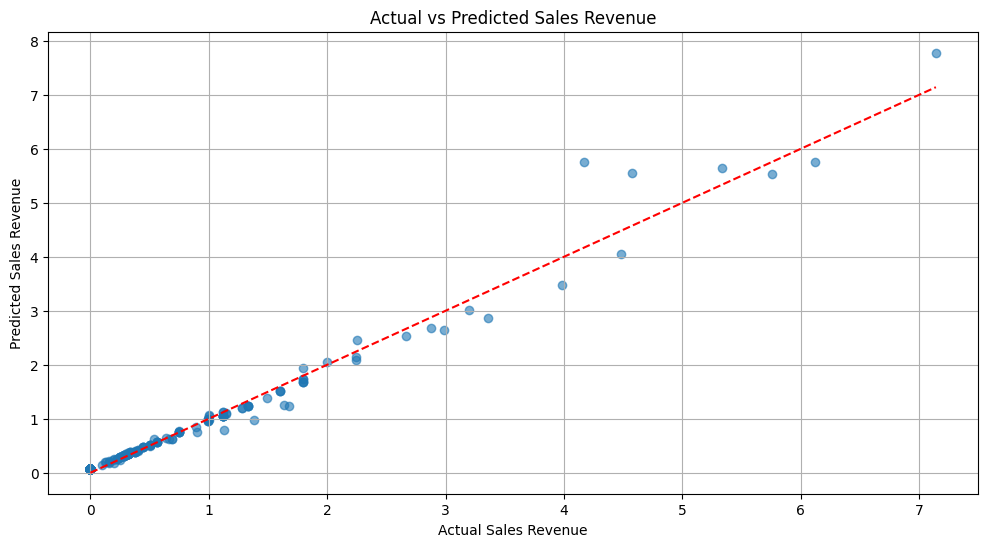

In [15]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


# 1. Load the saved artifacts
artifacts = joblib.load('../../models/predictive/prediction_artefacts.joblib')
loaded_model = artifacts['model']
features = artifacts['features']

# Ensure that your input data for prediction (e.g., X_test) has the same features as before.
# If you have a new dataset for prediction, replace X_test with that dataset.
# Ensure that this dataset only includes feature columns and not the target.

# 2. Use the loaded model to predict
y_pred_loaded = loaded_model.predict(X_test)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_loaded))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
# Compute R^2
r2 = r2_score(y_test, y_pred_loaded)
print(f"R-squared (R2): {r2:.2f}")

# 3. Plot actual vs. predicted values
plt.figure(figsize=(12, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred_loaded, alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction

plt.title('Actual vs Predicted Sales Revenue')
plt.xlabel('Actual Sales Revenue')
plt.ylabel('Predicted Sales Revenue')
plt.grid(True)
plt.show()


In [30]:
encoded_data.head()

,Sales Day,event_type,Daily volume of sales,Daily selling price,Sales Revenue,Day of Week,Month,Year,event_name_Christmas,event_name_Cinco De Mayo,...,event_name_Pesach End,event_name_PresidentsDay,event_name_Purim End,event_name_Ramadan starts,event_name_StPatricksDay,event_name_SuperBowl,event_name_Thanksgiving,event_name_ValentinesDay,event_name_VeteransDay,event_name_no specific event
0,1,0,3,0.6,1.8,5,1,2011,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0.0,0.0,6,1,2011,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0.0,0.0,0,1,2011,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0,1,0.2,0.2,1,2,2011,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,4,0.8,3.2,2,2,2011,0,0,...,0,0,0,0,0,0,0,0,0,1
